In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


def calculate_gradient(theta, X, y):
    m = y.size
    return (X.T @ (sigmoid(X @ theta) - y )) / m


def gradient_descent(X, y, alpha=0.1, num_iter=100, tol=1e-7):
    
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    theta = np.zeros(X_b.shape[1])
    
    for i in range(num_iter):
        grad = calculate_gradient(theta, X_b, y)
        theta -= alpha * grad
        
        if np.linalg.norm(grad) < tol:
            break
        
    return theta

def predict_prob(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X_b @ theta)

def predict(X, theta, threshold=0.5):
    return (predict_prob(X, theta) >= threshold).astype(int)

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

theta_hat = gradient_descent(X_train_scaled, y_train, alpha=0.1)

y_pred_train = predict(X_train_scaled, theta_hat)
y_pred_test = predict(X_test_scaled, theta_hat)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(train_acc)
print(test_acc)


0.978021978021978
0.9649122807017544


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
X, y = load_breast_cancer(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


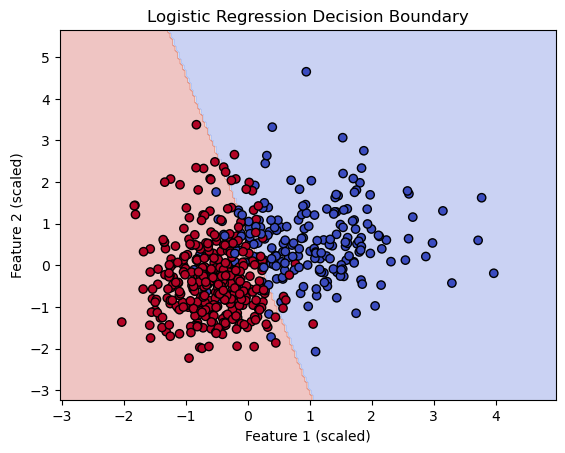

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load data (using only 2 features for plotting)
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]  # use only the first two features

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegression()
model.fit(X_scaled, y)

# Create meshgrid for plotting decision surface
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.show()